## MNIST classification using PyTorch

## 1. Importing libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Torch
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## 2. Playing around with torch

### 2.1 Multiplication

In [2]:
x = torch.Tensor([5,3])
y = torch.Tensor([1,2])

print(x * y)
print(x @ y)
print(torch.matmul(x,y))

tensor([5., 6.])
tensor(11.)
tensor(11.)


### 2.2 Initialization

In [3]:
x = torch.zeros([2,5])
print(x)
x.shape

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


torch.Size([2, 5])

In [4]:
y = torch.rand([2,5])
print(y)

tensor([[0.0263, 0.2611, 0.9786, 0.0304, 0.0551],
        [0.9238, 0.0645, 0.5383, 0.3537, 0.5221]])


### 2.3 Reshaping

In [5]:
# Reshaping in 
y = torch.rand([2,5])
y.view([1,10])

tensor([[0.8582, 0.6208, 0.5766, 0.4445, 0.4212, 0.3609, 0.3222, 0.7340, 0.4772,
         0.6029]])

In [6]:
# Operation not 'inplace'
y

tensor([[0.8582, 0.6208, 0.5766, 0.4445, 0.4212],
        [0.3609, 0.3222, 0.7340, 0.4772, 0.6029]])

## 3. MNIST classification

### 3.1 Data inspection

In [7]:
train = datasets.MNIST("../", 
                       train=True, 
                       download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("../", 
                       train=False, 
                       download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

In [8]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

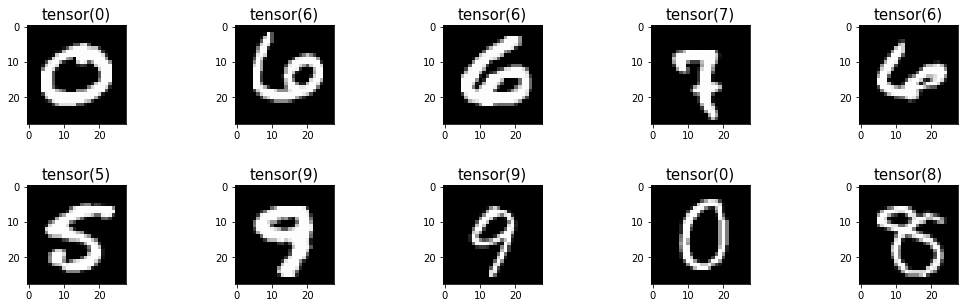

In [9]:
# Plotting a sample dataset
for data in trainset:
    break
    
    
fig, ax = plt.subplots(2,5,figsize=(15,5))
ax = ax.ravel()
fig.tight_layout(pad=4)

for i, (x, y )in enumerate(zip(data[0],data[1])):
    ax[i].imshow(x.view([28,28]), cmap='gray')
    ax[i].set_title(y, fontsize=15)
    

In [10]:
# Seeing whether the dataset is imbalanced
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] +=1
        total +=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [11]:
for i in counter_dict:
    print(f"{i}: {np.around(100* (counter_dict[i]/total),3)}")

0: 9.872
1: 11.237
2: 9.93
3: 10.218
4: 9.737
5: 9.035
6: 9.863
7: 10.442
8: 9.752
9: 9.915


### 3.2 Building the neural network

#### 3.2.1 Network initialization

In [12]:


IMAGE_SIZE_1D = xs[0].size()[1] * xs[0].size()[2]

class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=IMAGE_SIZE_1D, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
        

tensor(6)


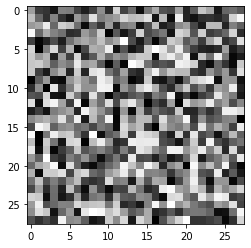

In [22]:
# Sample testing whether the network outputs without error

X = torch.rand([28,28]).view(-1,784)
net = Net()
output = net(X)
print(output.argmax())

plt.imshow(X.view([28,28]), cmap='gray')

#### 3.2.2 Training the network

In [35]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 10

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of features and labels
        X, y = data
        
        # Zero the gradient before the run
        net.zero_grad()
        
        # Compute the loss
        output = net(X.view(-1,IMAGE_SIZE_1D))
        loss = F.nll_loss(output, y)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
    print(loss)

tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(1.7690e-05, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(1.0907e-05, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(3.2186e-07, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(7.1526e-08, grad_fn=<NllLossBackward0>)


#### 3.2.3 Testing

In [39]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,IMAGE_SIZE_1D))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1 
            total +=1
print("Accuracy = {}".format(np.around(correct/total,3)))
            
        

Accuracy = 0.995


#### 3.2.4 Verifying output

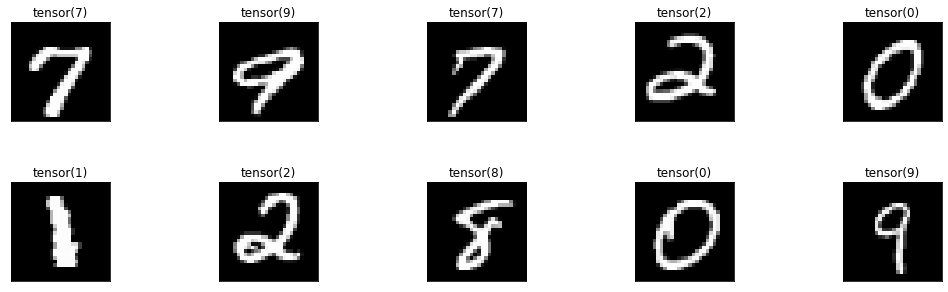

In [46]:
fig, ax = plt.subplots(2,5,figsize=(15,5))
ax = ax.ravel()
fig.tight_layout(pad=4)

for i, x in enumerate(X):
    ax[i].imshow(x.view([28,28]), cmap='gray')
    ax[i].set_title(torch.argmax(net(x.view([-1,IMAGE_SIZE_1D]))))
    ax[i].set_xticks([])
    ax[i].set_yticks([])